In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
tipsdf = sns.load_dataset('tips')

In [5]:
tipsdf.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
titanicdf = pd.read_csv('tested.csv')
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
flightsdf = sns.load_dataset('flights')
flightsdf.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [6]:
irisdf = sns.load_dataset('iris')
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 1. Scatter Plot (Numerical datatype column - Numerical datatype column)

<Axes: xlabel='total_bill', ylabel='tip'>

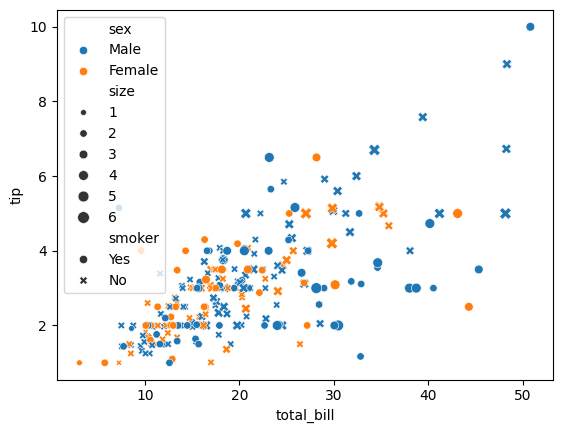

In [12]:
sns.scatterplot(x=tipsdf['total_bill'], y=tipsdf['tip'],hue=tipsdf['sex'], style=tipsdf['smoker'], size=tipsdf['size'])

# 2. Bar Plot (Numerical - Categorical)

<Axes: xlabel='total_bill', ylabel='sex'>

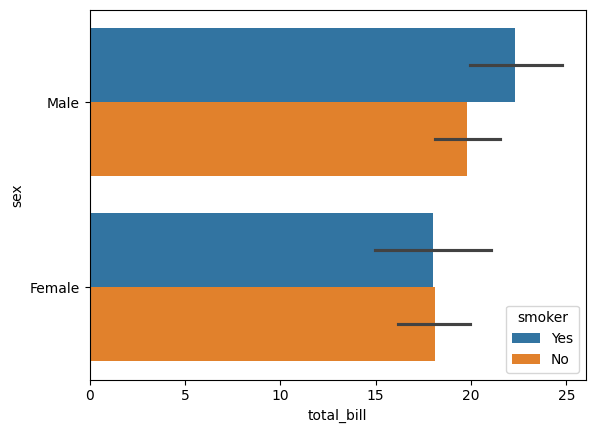

In [18]:
sns.barplot(x=tipsdf['total_bill'], y=tipsdf['sex'], hue=tipsdf['smoker'])
# check the confidence interval


<Axes: xlabel='Pclass', ylabel='Fare'>

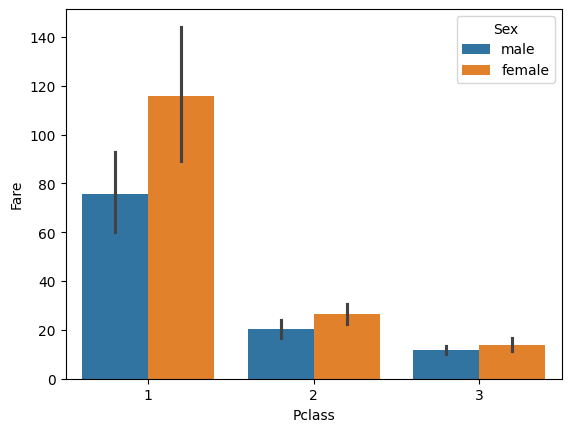

In [19]:
sns.barplot(x=titanicdf['Pclass'], y=titanicdf['Fare'], hue=titanicdf['Sex'])

# 3. Box plot (5 point summary) (Numerical - Categorical)

<Axes: xlabel='Survived', ylabel='Age'>

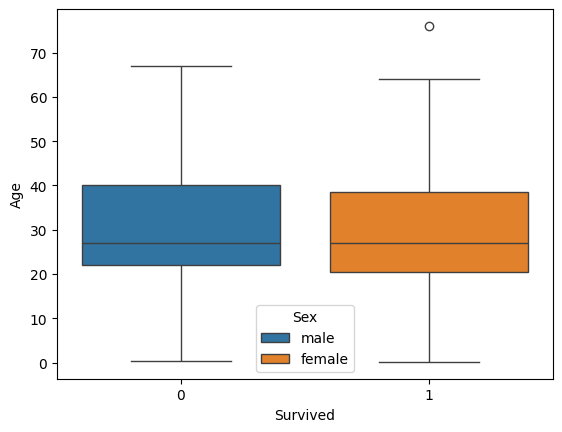

In [24]:
# look at this example to choose the right plot
# sns.boxplot(x=titanicdf['Pclass'], y=titanicdf['Survived'], hue=titanicdf['Sex'])

sns.boxplot(x=titanicdf['Survived'], y=titanicdf['Age'], hue=titanicdf['Sex'])



# 4. Displot (Numerical - Categorical)

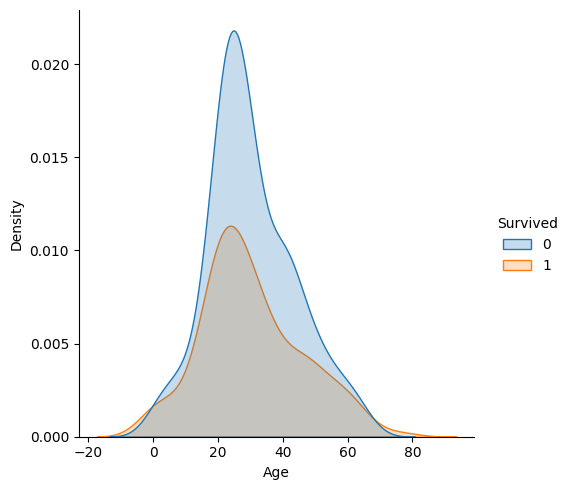

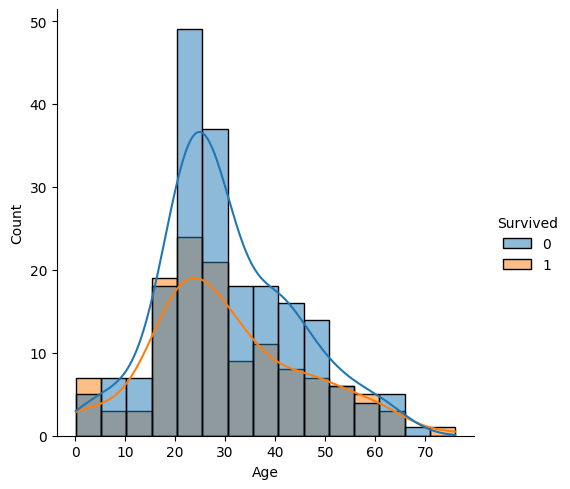

In [ ]:
sns.displot(data=titanicdf,x='Age', hue='Survived',kind='kde', fill=True)

sns.displot(data=titanicdf,x='Age', hue='Survived',kde=True)

# look at the construct difference. There is no hist param so if you want control the hist then go with the kind param

# 5. Heatmap (Categorical - Categorical)

Survived    0   1
Pclass           
1          57  50
2          63  30
3         146  72
Sex              female  male  Total
Pclass Survived                     
1      0              0    57     57
       1             50     0     50
2      0              0    63     63
       1             30     0     30
3      0              0   146    146
       1             72     0     72
Total               152   266    418
Survived    0   1
Pclass           
1          57  50
2          63  30
3         146  72
Survived  Pclass    0   1
0              1   57  50
1              2   63  30
2              3  146  72


<Axes: xlabel='Pclass', ylabel='count'>

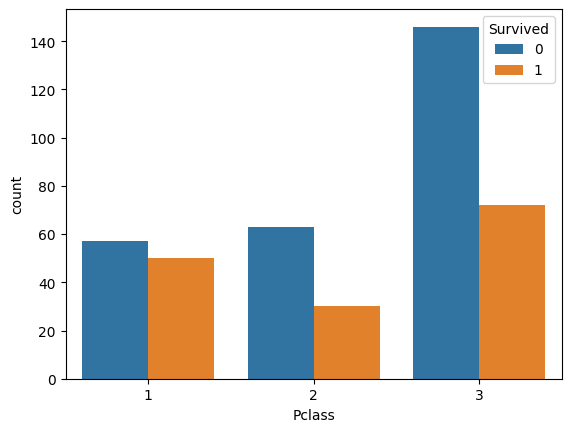

In [88]:
# Calculate how many has survived in each passenger class segeragted by sex
dfnew = pd.crosstab(titanicdf['Pclass'], titanicdf['Survived']) 
print(dfnew)

# Example of correct crosstab usage with index and columns
# multi-index rows (Pclass + Survived vs Sex)
dfnew1 = pd.crosstab(index=[titanicdf['Pclass'], titanicdf['Survived']], columns=titanicdf['Sex'],margins=True, margins_name='Total')
print(dfnew1)

# two-way table with aggregated values (mean Fare) instead of counts
dfnew2 = pd.crosstab(titanicdf['Pclass'], titanicdf['Survived'],values=titanicdf['Sex'],aggfunc='count')
print(dfnew2)
print(dfnew2.reset_index())
#sns.barplot(x=titanicdf['Pclass'], y=titanicdf['Sex'], hue=titanicdf['Survived'])
sns.countplot(x=titanicdf['Pclass'], hue=titanicdf['Survived'])



<Axes: xlabel='Survived', ylabel='Pclass'>

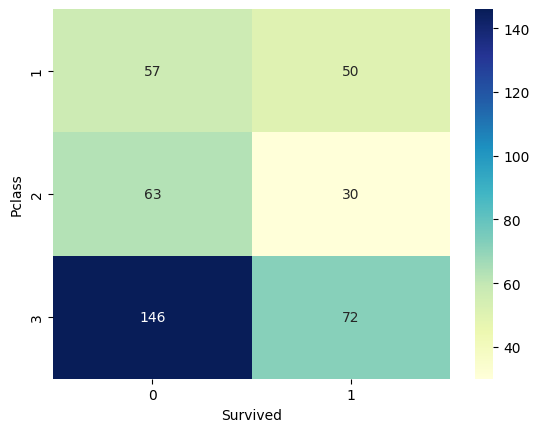

In [87]:
sns.heatmap(dfnew2, annot=True, fmt="d", cmap="YlGnBu")

# 6. Cluster Map (Categorical vs Categorical)

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


C:\Users\NILES8831\AppData\Local\Temp\ipykernel_37344\3633761544.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.clustermap(flightsdf.pivot_table(index='month', columns='year', values='passengers')    )


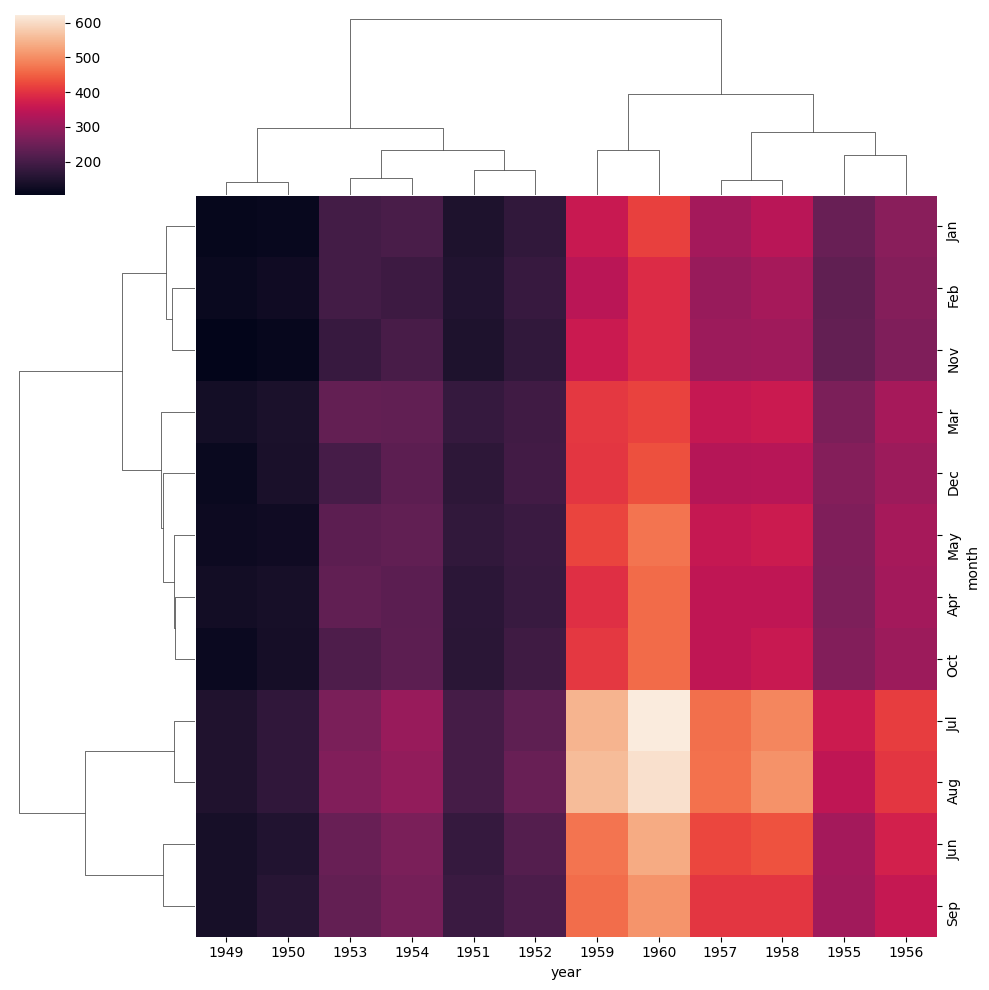

In [7]:
from scipy import stats
print(flightsdf.head())

sns.clustermap(flightsdf.pivot_table(index='month', columns='year', values='passengers')    )

# 7. Pair Plot

In [8]:
print(irisdf.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


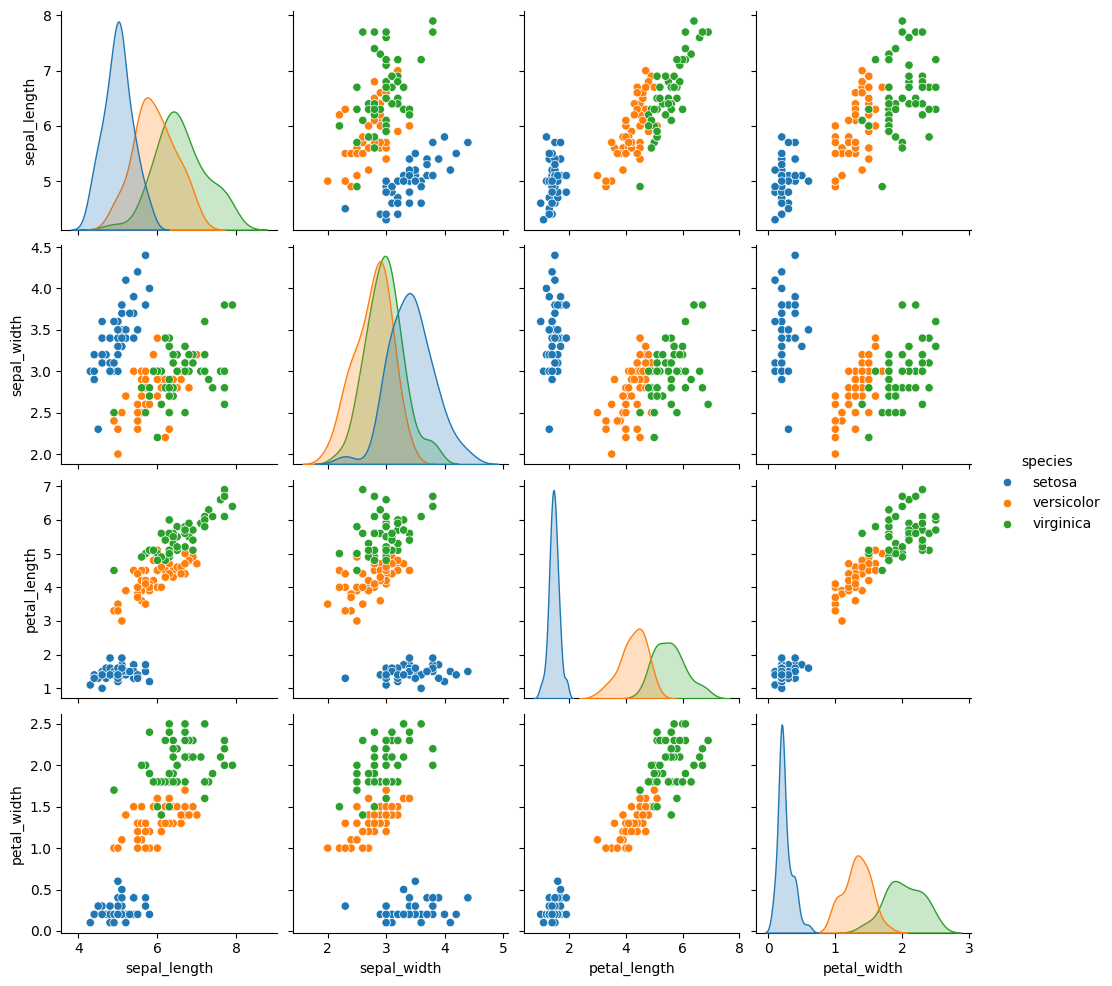

In [10]:
sns.pairplot(irisdf, hue='species', diag_kind='kde')

# 8. Line Plot (Numerical vs Numerical) plot data aginst time

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


<Axes: xlabel='year'>

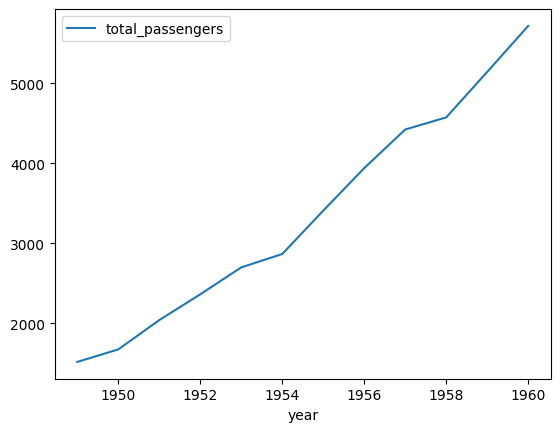

In [18]:
print (flightsdf.head())
# named aggregation (gives control and readable column names)
sns.lineplot(data=flightsdf.groupby('year').agg(total_passengers=('passengers','sum')))